# tranfer learning using object identifiction to car model identifiaction


In [31]:
pip install tensorflow_hub


In [32]:

import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import PIL.Image as Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


#pretrained model

In [33]:
image_size=(224,224)#input size mentioned in the pre tranied model
model = tf.keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224, 224)+(3,))
])


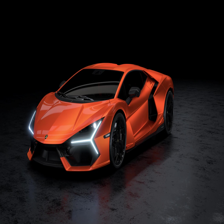

In [34]:
car=Image.open("/content/car.jpg").resize(image_size)# resizing the image
car

In [35]:
arr_car=np.array(car)/255.0
arr_car

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.10588235, 0.11764706, 0.13333333],
        [0.10196078, 0.10980392, 0.1254902 ],
        [0.10588235, 0

In [36]:
arr_car[np.newaxis,...].shape

(1, 224, 224, 3)

In [37]:

result=model.predict(arr_car[np.newaxis,...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [38]:
pred_index=np.argmax(result)
pred_index

818

In [39]:
image_labels=[]
with open("/content/data.txt", "r") as f:
  image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [40]:
image_labels[pred_index]

'sports car'

#testing code

In [41]:
import pathlib
data_dir= pathlib.Path("/content/drive/MyDrive/Cars Dataset/train")
data_dir_test=pathlib.Path("/content/drive/MyDrive/Cars Dataset/test")
data_dir

PosixPath('/content/drive/MyDrive/Cars Dataset/train')

In [42]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('/content/drive/MyDrive/Cars Dataset/train/Hyundai Creta/11.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Hyundai Creta/109.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Hyundai Creta/127.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Hyundai Creta/144.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Hyundai Creta/122.jpg')]

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
image_len=len(list(data_dir.glob("*/*.jpg")))

image_len


3352

In [45]:
Audi=list(data_dir.glob("Audi/*.jpg"))
Audi[:5]

[PosixPath('/content/drive/MyDrive/Cars Dataset/train/Audi/1009.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Audi/1001.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Audi/1007.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Audi/1005.jpg'),
 PosixPath('/content/drive/MyDrive/Cars Dataset/train/Audi/10.jpg')]

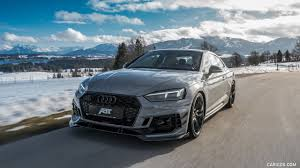

In [46]:
Image.open(str(Audi[5]))

In [47]:
cars_images_dict={

'Audi': list(data_dir.glob('Audi/*')),

'Hyundai Creta': list(data_dir.glob('Hyundai Creta/*')),

'Mahindra Scorpio': list(data_dir. glob('Mahindra Scorpio/*')),

'Rolls Royce': list(data_dir.glob ('Rolls Royce/*')),

'Swift': list(data_dir.glob('Swift/*')),

 'Tata Safari': list(data_dir.glob('Tata Safari/*')),

 'Toyota Innova':list(data_dir.glob('Toyota Innova/*'))

}

In [48]:
cars_labels_dict={

'Audi': 0,

'Hyundai Creta': 1,

'Mahindra Scorpio': 2,

'Rolls Royce': 3,

'Swift': 4,

 'Tata Safari': 5,

 'Toyota Innova':6

}

In [49]:
img=cv2.imread(str(cars_images_dict["Swift"][4]))
img.shape

(195, 259, 3)

In [50]:
x,y=[],[]
for carName,images in cars_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_image=cv2.resize(img,(224,224))
    x.append(resized_image)
    y.append(cars_labels_dict[carName])

In [ ]:
x = np.array(x)
y = np.array(y)


In [ ]:
x = x / 255


#Make prediction using pre-trained model on new flowers dataset

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
y[2000].shape

()

In [ ]:
predicted = model.predict(np.array([x[0], x[1], x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 110ms/step


array([657, 818, 818])

In [ ]:
image_labels[905]


'window screen'

#adding pre trained model + cars classifier

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_cars = 6

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_cars)
])

model.summary()

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])



In [ ]:
model.fit(x,y,epochs=5,batch_size=128)